In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.shape

(1460, 81)

In [4]:
train_data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [6]:
train_data.isnull().sum().sum()

7829

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_data.drop(columns=["Id"], inplace=True)

excessive_na_cols = ["Alley", "PoolQC", "Fence", 'MasVnrType', "MiscFeature", 'FireplaceQu']

train_data.drop(columns=excessive_na_cols, inplace=True)

In [9]:
for column in train_data.select_dtypes(include='object').columns:
    most_frequent_value = train_data[column].value_counts(normalize=True).max()
    
    if most_frequent_value >= 0.90:
        print(f"Column: {column}")
        print(f"Most frequent category makes up {most_frequent_value * 100:.2f}% of the values.\n")

Column: Street
Most frequent category makes up 99.59% of the values.

Column: Utilities
Most frequent category makes up 99.93% of the values.

Column: LandSlope
Most frequent category makes up 94.66% of the values.

Column: Condition2
Most frequent category makes up 98.97% of the values.

Column: RoofMatl
Most frequent category makes up 98.22% of the values.

Column: BsmtCond
Most frequent category makes up 92.13% of the values.

Column: Heating
Most frequent category makes up 97.81% of the values.

Column: CentralAir
Most frequent category makes up 93.49% of the values.

Column: Electrical
Most frequent category makes up 91.43% of the values.

Column: Functional
Most frequent category makes up 93.15% of the values.

Column: GarageQual
Most frequent category makes up 95.07% of the values.

Column: GarageCond
Most frequent category makes up 96.16% of the values.

Column: PavedDrive
Most frequent category makes up 91.78% of the values.



In [10]:
unneccessary_cols = [
    "Street", "Utilities", "LandSlope", "Condition2", "RoofMatl", "BsmtCond", 
    "Heating", "Electrical", "Functional", "GarageQual", "GarageCond", "PavedDrive"
]

train_data.drop(columns=unneccessary_cols, inplace=True)

In [11]:
from sklearn.impute import SimpleImputer

num_cols = train_data.select_dtypes(include=['number']).columns
mean_imputer = SimpleImputer(strategy='mean')

train_data[num_cols] = mean_imputer.fit_transform(train_data[num_cols])

In [12]:
# categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

mode_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = mode_imputer.fit_transform(train_data[categorical_cols])

In [13]:
train_data.isnull().sum().sum()

0

In [14]:
relevant_columns = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Neighborhood',
    'Condition1', 'LotArea', 'HeatingQC', 'TotRmsAbvGrd',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'SaleType', 
    'SaleCondition', 'LotFrontage','MasVnrArea', 'MoSold', 
    'YrSold', 'SalePrice',
]
train_data = train_data[relevant_columns]

In [15]:
train_data.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Neighborhood', 'Condition1',
       'LotArea', 'HeatingQC', 'TotRmsAbvGrd', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'SaleType', 'SaleCondition', 'LotFrontage',
       'MasVnrArea', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
numerical_columns = [
    'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
  'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea'
]


def handle_outliers(train_data, column, method='remove'):
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'remove':
        train_data = train_data[(train_data[column] >= lower_bound) & (train_data[column] <= upper_bound)]
    elif method == 'cap':
        train_data[column] = train_data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return train_data

for column in numerical_columns:
    train_data = handle_outliers(train_data, column, method='remove') # cap

In [18]:
train_data.describe()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,YearBuilt,YearRemodAdd,LotArea,TotRmsAbvGrd,FullBath,HalfBath,BedroomAbvGr,LotFrontage,MasVnrArea,MoSold,YrSold,SalePrice
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,5.972615,1429.412544,1027.022968,1106.778269,317.435512,447.808304,1969.454947,1984.440813,9167.280035,6.343640,1.501767,0.350707,2.844523,67.705955,62.811936,6.378092,2007.815371,168774.807420
std,1.247509,422.367920,318.288818,302.196950,407.634586,194.404646,30.976571,20.883726,2755.295300,1.448596,0.529415,0.495577,0.773475,13.560233,99.626565,2.726264,1.319249,58871.969305
min,1.000000,438.000000,105.000000,438.000000,0.000000,0.000000,1872.000000,1950.000000,1974.000000,3.000000,0.000000,0.000000,0.000000,33.000000,0.000000,1.000000,2006.000000,34900.000000
25%,5.000000,1099.750000,804.000000,869.000000,0.000000,308.000000,1950.000000,1965.000000,7500.000000,5.000000,1.000000,0.000000,2.000000,60.000000,0.000000,5.000000,2007.000000,129000.000000
50%,6.000000,1395.500000,969.500000,1052.000000,0.000000,462.000000,1971.000000,1993.000000,9100.000000,6.000000,1.000000,0.000000,3.000000,70.049958,0.000000,6.000000,2008.000000,157000.000000
75%,7.000000,1694.500000,1218.250000,1302.000000,704.750000,566.250000,2000.000000,2003.000000,10800.000000,7.000000,2.000000,1.000000,3.000000,75.000000,108.000000,8.000000,2009.000000,197125.000000
max,10.000000,2730.000000,1952.000000,2028.000000,1611.000000,954.000000,2010.000000,2010.000000,17104.000000,12.000000,3.000000,2.000000,6.000000,105.000000,366.000000,12.000000,2010.000000,446261.000000


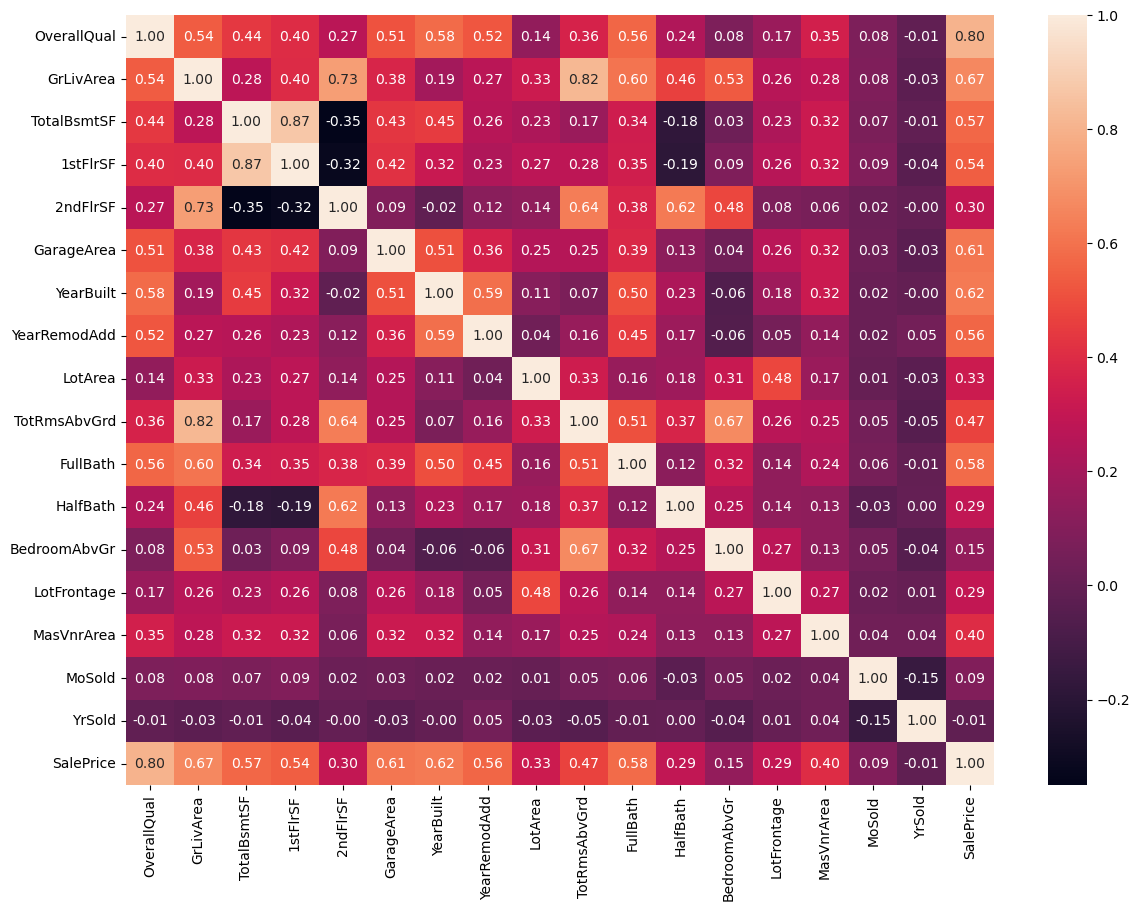

SalePrice       1.000000
OverallQual     0.800236
GrLivArea       0.666213
YearBuilt       0.621623
GarageArea      0.609885
FullBath        0.583217
TotalBsmtSF     0.568116
YearRemodAdd    0.562600
1stFlrSF        0.544159
TotRmsAbvGrd    0.470684
MasVnrArea      0.403255
LotArea         0.329892
2ndFlrSF        0.297170
LotFrontage     0.294456
HalfBath        0.290677
BedroomAbvGr    0.146087
MoSold          0.089347
YrSold         -0.014557
Name: SalePrice, dtype: float64


In [19]:
# corr with salprice
numerical_df = train_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_saleprice)


In [20]:
weak_features = ["BedroomAbvGr", "MoSold", "YrSold"]
train_data = train_data.drop(columns=weak_features)

In [21]:
train_data["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454    185000.0
1455    175000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1132, dtype: float64

In [20]:
from scipy.stats import skew
from numpy import log1p

skewed_features = train_data[numerical_columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
print(skewness)

skewed_features = skewness[skewness['Skew'] > 0.75].index
train_data[skewed_features] = train_data[skewed_features].apply(lambda x: log1p(x))

                 Skew
MasVnrArea   1.417217
2ndFlrSF     0.758154
1stFlrSF     0.595739
GrLivArea    0.536203
TotalBsmtSF  0.497570
LotArea      0.068741
LotFrontage -0.078812
GarageArea  -0.145446


In [21]:
train_data = pd.get_dummies(train_data, columns=[
    'Neighborhood', 'Condition1', 'SaleType', 'SaleCondition', 'HeatingQC'
], drop_first=True)

In [22]:
train_data.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GarageArea', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'TotRmsAbvGrd',
       'FullBath', 'HalfBath', 'LotFrontage', 'MasVnrArea', 'SalePrice',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'SaleType_CWD',
       'SaleType_

In [23]:
train_data.shape[1]

62

In [24]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                      'GarageArea', 'YearBuilt', 'YearRemodAdd',
                      'LotArea', 'LotFrontage', 'MasVnrArea',
                      'TotRmsAbvGrd', 'FullBath', 'HalfBath']

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
X_train.shape

(792, 61)

In [27]:
X_val.shape

(340, 61)

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_val)
y_pred

array([187359.59252241, 111920.66887193, 117208.2568226 , 269643.77902764,
       218078.48392894,  68510.60488382, 184912.60003564, 199041.09570563,
        89025.20856908, 249847.00698564, 202907.21495377, 218860.41587473,
       152382.45499631, 216151.00854695, 149081.36349576, 261162.84703727,
       121265.25113893, 136798.85130894, 174612.5482471 , 105682.00390029,
       156056.10872914, 280271.98526157, 131154.84133478,  95985.71903665,
       121721.40897542, 177160.33932343, 147493.98530263, 140561.37563853,
       162488.40360826,  64474.70365252, 105627.53351743, 103256.38819859,
       171773.77957565, 178391.34077239, 195709.87480596, 124874.82967219,
       204458.67373461, 170034.76850103, 128724.8952066 , 214004.81061719,
       131282.87192898, 155331.21570384, 141262.29056743, 179309.09324364,
       298457.62648974, 289706.74242716, 189793.39821339,  83645.38250067,
       107764.45995527, 186135.05200116, 123607.12731181, 166176.81953972,
       152497.65941721, 1

In [29]:
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
# Calculate RMSE
rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 504314193.88323164
Root Mean Squared Error: 22456.940884350926


In [30]:
y_val

999     206000.0
1145    149000.0
535     107500.0
600     275000.0
948     192500.0
          ...   
396     123000.0
433     181000.0
910     154300.0
1067    167900.0
863     132500.0
Name: SalePrice, Length: 340, dtype: float64

In [31]:
y_pred[0]

187359.59252240806

In [32]:
# 13% in average misses the price
22456.94088435092 / 168774.807420 * 100

13.305860766569447

In [36]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=7)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_val)

mse_ridge = mean_squared_error(y_val, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

rmse_ridge = np.sqrt(np.mean((y_val - y_pred_ridge) ** 2))
print(f'Square Root Mean Squared Error: {rmse_ridge}')

Mean Squared Error (Ridge): 470483852.96764004
Square Root Mean Squared Error: 21690.63975468774


In [34]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_val)

mse_lasso = mean_squared_error(y_val, y_pred_lasso)
print(f'Mean squared error (lasso): {mse_lasso}')

rmse_lasso = np.sqrt(np.mean((y_val - y_pred_lasso) ** 2))
print(f'Square Root Mean Squared Error: {rmse_lasso}')

Mean squared error (lasso): 504275531.0881351
Square Root Mean Squared Error: 22456.080047241892


In [35]:
# Doing the same preproccessing steps on test dataset and creating a submission file

relevant_columns_test = ['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GarageArea',
 'YearBuilt',
 'YearRemodAdd',
 'Neighborhood',
 'Condition1',
 'LotArea',
 'HeatingQC',
 'TotRmsAbvGrd',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'SaleType',
 'SaleCondition',
 'LotFrontage',
 'MasVnrArea',
 'MoSold',
 'YrSold',]

numerical_columns = [
    'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
  'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea'
]

test_data = pd.read_csv("test.csv")
test_data = test_data.set_index("Id")
test_data.drop(columns=excessive_na_cols, inplace=True)
test_data.drop(columns=unneccessary_cols, inplace=True)
num_cols = test_data.select_dtypes(include=['number']).columns
test_data[num_cols] = mean_imputer.fit_transform(test_data[num_cols])
categorical_cols = test_data.select_dtypes(include=['object']).columns
test_data[categorical_cols] = mode_imputer.fit_transform(test_data[categorical_cols])
test_data = test_data[relevant_columns_test]
for column in numerical_columns:
    test_data = handle_outliers(test_data, column, method='cap') # cap
test_data = test_data.drop(columns=weak_features)
test_data = pd.get_dummies(test_data, columns=[
    'Neighborhood', 'Condition1', 'SaleType', 'SaleCondition', 'HeatingQC'
], drop_first=True)
test_data = test_data[X_train.columns]
test_data[numerical_features] = scaler.fit_transform(test_data[numerical_features])
y_test_pred = ridge_model.predict(test_data)
# Prepare submission DataFrame
submission = pd.DataFrame({
    'Id': test_data.index,       
    'SalePrice': y_test_pred     
})
submission.to_csv("results.csv", index=False)